In [3]:
import ujson
import datetime as dt
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns
import scipy.fftpack as ff
import scipy.stats as ss

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
ingnored_dates = set([dt.date(2015, 3, 7), dt.date(2015, 3, 8), dt.date(2015, 2, 13), dt.date(2015, 2, 14), dt.date(2015, 1, 6), dt.date(2015, 1, 7), dt.date(2015, 4, 11), 
                  dt.date(2015, 4, 12), dt.date(2015, 2, 22), dt.date(2015, 2, 23), dt.date(2015, 5, 8), dt.date(2015, 5, 9), dt.date(2015, 1, 25), dt.date(2015, 1, 18), 
                  dt.date(2015, 1, 19), dt.date(2015, 3, 31), dt.date(2015, 4, 1), dt.date(2015, 6, 20), dt.date(2015, 6, 21), dt.date(2015, 7, 8), dt.date(2015, 5, 11), 
                  dt.date(2015, 5, 12), dt.date(2015, 7, 11), dt.date(2015, 1, 13), dt.date(2015, 1, 14), dt.date(2015, 4, 30), dt.date(2015, 5, 1), dt.date(2015, 11, 29), 
                  dt.date(2015, 2, 20), dt.date(2015, 10, 5), dt.date(2015, 5, 15), dt.date(2015, 3, 26), dt.date(2015, 5, 28), dt.date(2015, 10, 25), dt.date(2015, 1, 1), 
                  dt.date(2015, 11, 10), dt.date(2015, 11, 21), dt.date(2015, 9, 1), dt.date(2015, 6, 1), dt.date(2015, 7, 25), dt.date(2015, 6, 12), dt.date(2015, 8, 9), 
                  dt.date(2015, 2, 17), dt.date(2015, 9, 27), dt.date(2015, 7, 31), dt.date(2015, 3, 27), dt.date(2015, 9, 28)])

In [46]:
lines = []
date_set = set()
with open("/Users/anokhin/Desktop/presents_2015_1x_N_1M.txt") as tlf:
    for line in tlf:
        uid, json_str = line.strip().split("\t")
                
        json = ujson.loads(json_str)
        
        data = {"uid": uid}
        for day, stats in json:
            date = dt.datetime.strptime(day, "%Y%m%d").date()            
            if date in ingnored_dates:
                continue
            else:                
                date_set.add(date)
            
            data[date] = stats
                
        lines.append(data)
        
        if len(lines) >= 100000:
            break

dates = sorted(date_set)
prices = range(1, 101)
uids = []

price_mat = np.zeros((len(lines), len(dates), len(prices)), dtype=int)

for i, line in enumerate(lines):
    uids.append(line["uid"])
    for j, date in enumerate(dates):
        if date in line:
            for p, count in line.get(date, {}).iteritems():
                if int(p) > 100:
                    print "uid %s = date %s --> %s" % (line["uid"], date, p)                    
                else:
                    price_mat[i, j, int(p) - 1] = count

uid N:574550641061 = date 2015-11-28 --> 101


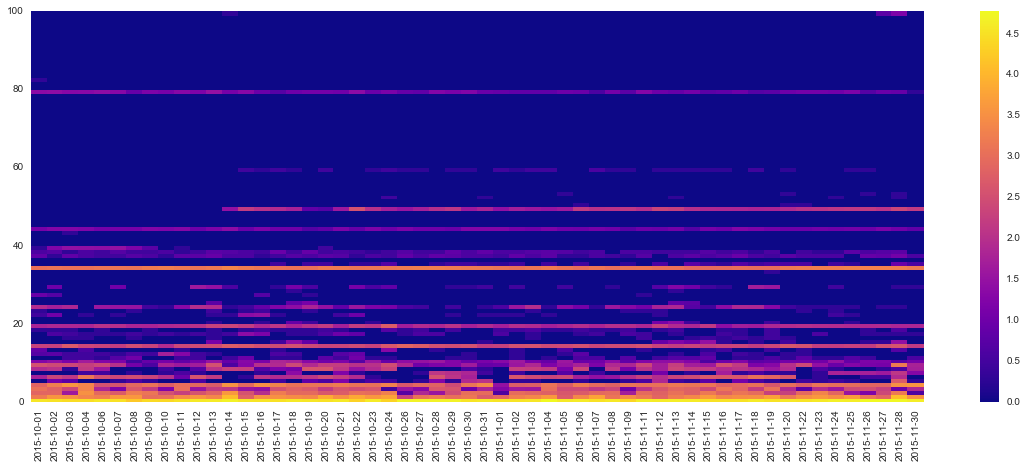

In [51]:
uid_sublist = uids
sublist_ind = [i for i, uid in enumerate(uids) if uid in uids]

sublist_presents = np.sum(price_mat[sublist_ind], axis=0).T

pl.figure(figsize=(20, 7))
pl.pcolor(np.log10(sublist_presents + 1), cmap='plasma')
pl.colorbar()
pl.xlim(0, len(dates))
pl.xticks([i + 0.5 for i in xrange(len(dates))], dates, rotation='vertical')
pl.show()